Reading CSV file: fault_analysis.csv

Preview of the data:


,filename,dice_coefficient,status
0,image_0.png,0.9912,SUCCESS
1,image_1.png,1.0000,SUCCESS
2,image_10.png,0.9939,SUCCESS
3,image_100.png,1.0000,SUCCESS
4,image_1000.png,1.0000,SUCCESS



Available columns:
0: filename
1: dice_coefficient
2: status

Found 28101 records in CSV file
Using dice coefficient column: 'dice_coefficient'

Dice Coefficient Statistics:
Total samples: 28101
Mean: 0.9787
Median: 0.9882
Standard Deviation: 0.0542
Min: 0.0000
Max: 1.0000
Samples below threshold (0.93): 732 (2.60%)
Samples above threshold (0.93): 27369 (97.40%)


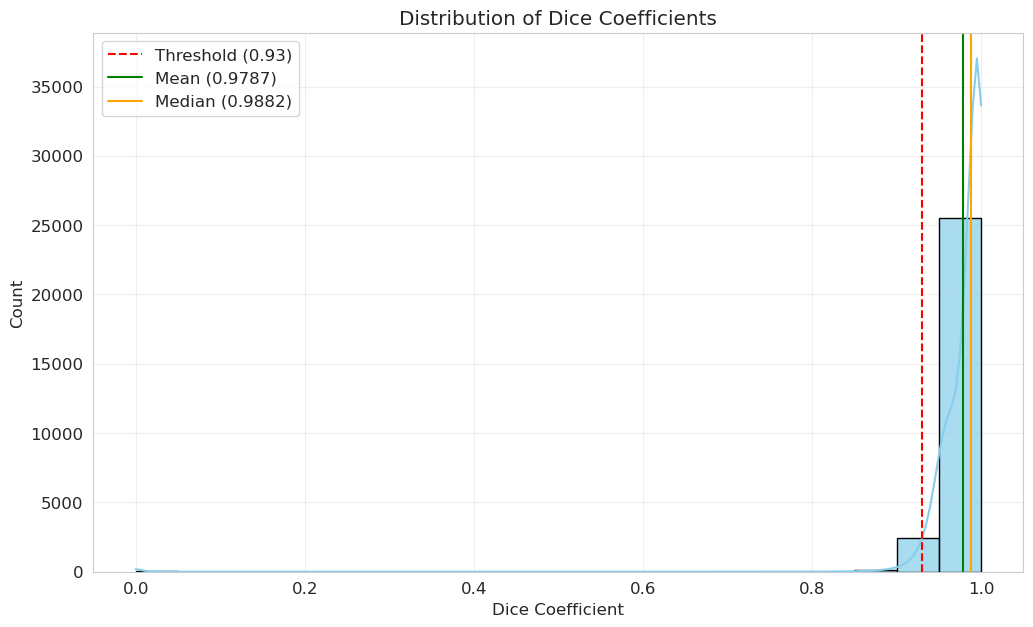

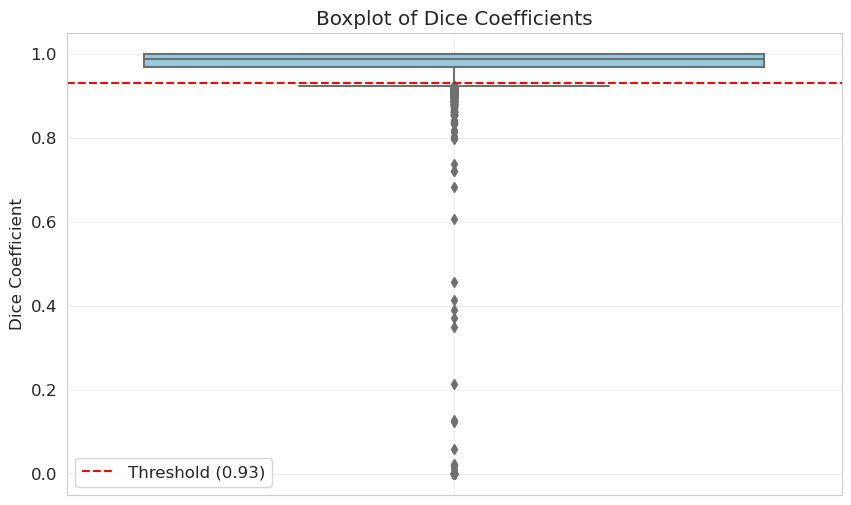

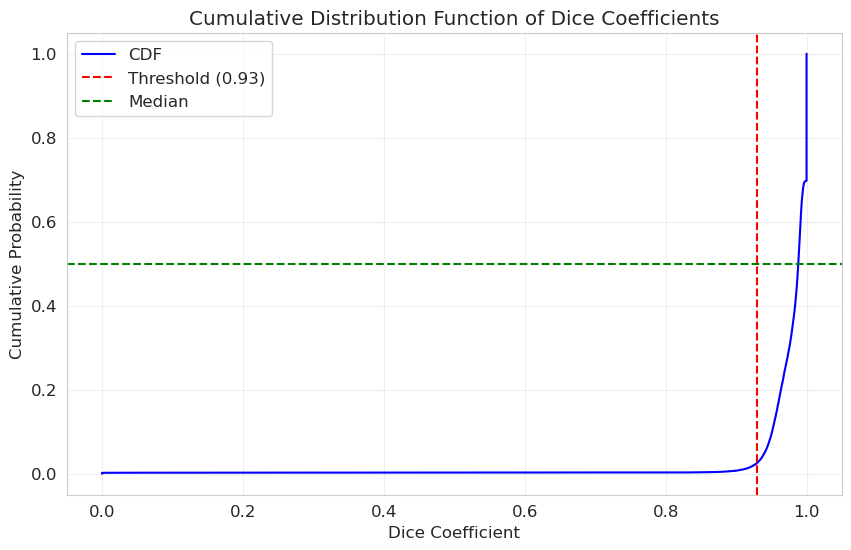

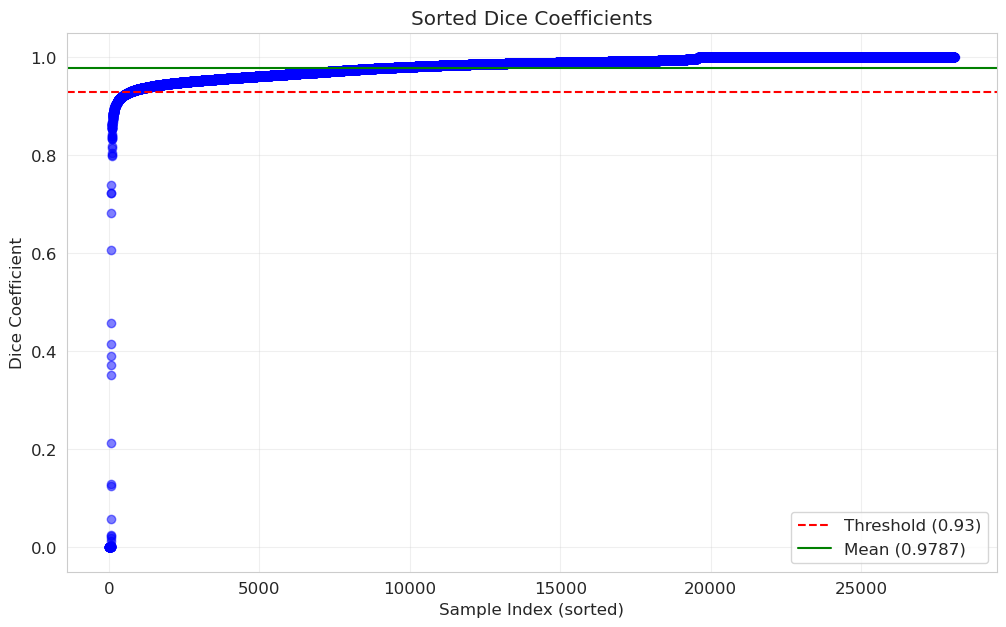


Do you want to analyze dice coefficients by a category?
Available columns:
0: filename
1: dice_coefficient
2: status


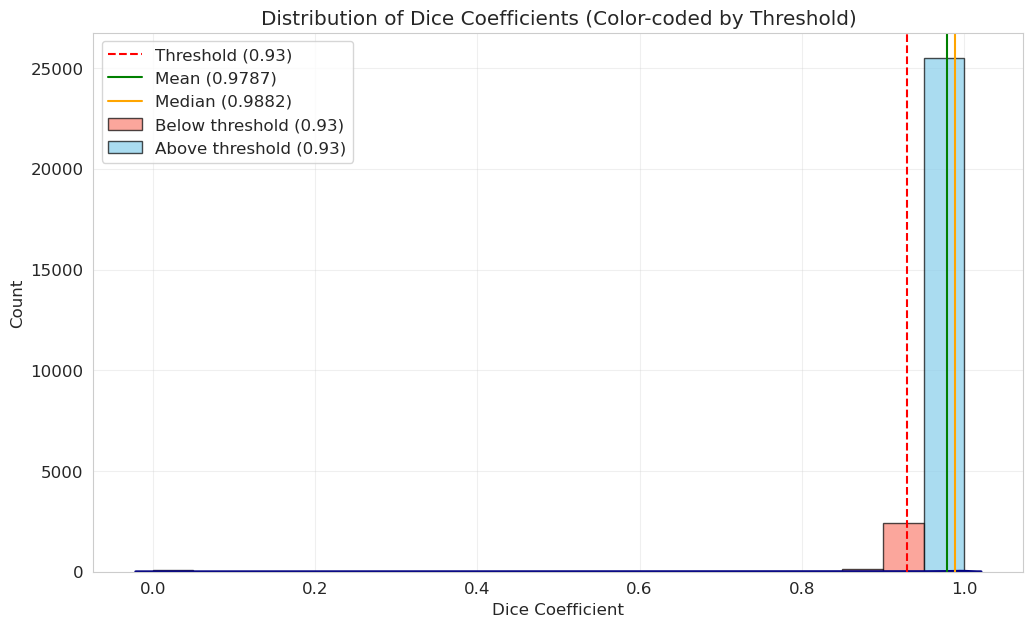


Analysis complete!


In [1]:
# Dice Coefficient Distribution Visualization
# For analyzing fault_analysis.csv in the same directory

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set up nice plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# Define configuration parameters
csv_path = 'fault_analysis.csv'  # CSV file in the same folder
dice_column = 'dice_coefficient'  # Change this if your column has a different name
threshold = 0.95  # Threshold value to highlight good/poor dice scores
bins = 20  # Number of bins for histogram
category_column = None  # Change this if you want to analyze by category, e.g. 'image_type'

# Load the CSV file
print(f"Reading CSV file: {csv_path}")
df = pd.read_csv(csv_path)

# Check if dice column exists
if dice_column not in df.columns:
    print(f"ERROR: Column '{dice_column}' not found in CSV file")
    print(f"Available columns: {', '.join(df.columns)}")
    dice_column = input("Please enter the correct column name for dice coefficients: ")

# Show the first few rows of the dataframe
print("\nPreview of the data:")
display(df.head())

# Display available columns to help identify the dice column
print("\nAvailable columns:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Show basic information about the dataset
print(f"\nFound {len(df)} records in CSV file")
print(f"Using dice coefficient column: '{dice_column}'")

# Extract dice coefficient values
dice_values = df[dice_column].values

# Calculate basic statistics
stats = {
    'count': len(dice_values),
    'mean': np.mean(dice_values),
    'median': np.median(dice_values),
    'std': np.std(dice_values),
    'min': np.min(dice_values),
    'max': np.max(dice_values),
    'below_threshold': np.sum(dice_values < threshold),
    'above_threshold': np.sum(dice_values >= threshold),
    'percent_below': np.sum(dice_values < threshold) / len(dice_values) * 100,
    'percent_above': np.sum(dice_values >= threshold) / len(dice_values) * 100
}

# Print statistics
print("\nDice Coefficient Statistics:")
print(f"Total samples: {stats['count']}")
print(f"Mean: {stats['mean']:.4f}")
print(f"Median: {stats['median']:.4f}")
print(f"Standard Deviation: {stats['std']:.4f}")
print(f"Min: {stats['min']:.4f}")
print(f"Max: {stats['max']:.4f}")
print(f"Samples below threshold ({threshold}): {stats['below_threshold']} ({stats['percent_below']:.2f}%)")
print(f"Samples above threshold ({threshold}): {stats['above_threshold']} ({stats['percent_above']:.2f}%)")

# Create histogram with density curve
plt.figure(figsize=(12, 7))
ax = sns.histplot(dice_values, bins=bins, kde=True, color='skyblue', 
                edgecolor='black', alpha=0.7)

# Add vertical line for threshold
plt.axvline(x=threshold, color='red', linestyle='--', 
            label=f'Threshold ({threshold})')

# Add vertical lines for mean and median
plt.axvline(x=np.mean(dice_values), color='green', linestyle='-', 
            label=f'Mean ({np.mean(dice_values):.4f})')
plt.axvline(x=np.median(dice_values), color='orange', linestyle='-', 
            label=f'Median ({np.median(dice_values):.4f})')

# Set labels and title
plt.xlabel('Dice Coefficient')
plt.ylabel('Count')
plt.title('Distribution of Dice Coefficients')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=dice_values, color='skyblue')
plt.axhline(y=threshold, color='red', linestyle='--', 
            label=f'Threshold ({threshold})')
plt.title('Boxplot of Dice Coefficients')
plt.ylabel('Dice Coefficient')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Create CDF plot
plt.figure(figsize=(10, 6))
sorted_dice = np.sort(dice_values)
cumulative = np.arange(1, len(sorted_dice) + 1) / len(sorted_dice)

plt.plot(sorted_dice, cumulative, label='CDF', color='blue')
plt.axvline(x=threshold, color='red', linestyle='--', 
            label=f'Threshold ({threshold})')
plt.axhline(y=0.5, color='green', linestyle='--', 
            label='Median')

plt.title('Cumulative Distribution Function of Dice Coefficients')
plt.xlabel('Dice Coefficient')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Create scatter plot to see if there are patterns in dice scores
plt.figure(figsize=(12, 7))
plt.scatter(range(len(dice_values)), sorted_dice, alpha=0.5, color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', 
            label=f'Threshold ({threshold})')
plt.axhline(y=np.mean(dice_values), color='green', linestyle='-', 
            label=f'Mean ({np.mean(dice_values):.4f})')
plt.title('Sorted Dice Coefficients')
plt.xlabel('Sample Index (sorted)')
plt.ylabel('Dice Coefficient')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Interactive: Add ability to analyze by category
print("\nDo you want to analyze dice coefficients by a category?")
print("Available columns:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Let the user decide if they want to use a category column
use_category = input("\nEnter the category column name or number (or press Enter to skip): ")

if use_category and use_category.strip():
    # Handle numeric input (column index)
    if use_category.isdigit() and int(use_category) < len(df.columns):
        category_column = df.columns[int(use_category)]
    else:
        category_column = use_category
    
    # Check if column exists
    if category_column in df.columns:
        print(f"Analyzing by category: {category_column}")
        
        # Count number of unique categories
        categories = df[category_column].unique()
        print(f"Found {len(categories)} unique values in {category_column}")
        
        # Boxplot by category
        plt.figure(figsize=(14, 8))
        sns.boxplot(x=category_column, y=dice_column, data=df, palette='Set3')
        plt.axhline(y=threshold, color='red', linestyle='--', 
                    label=f'Threshold ({threshold})')
        plt.title(f'Dice Coefficients by {category_column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.legend()
        plt.show()
        
        # Violin plot by category
        plt.figure(figsize=(14, 8))
        sns.violinplot(x=category_column, y=dice_column, data=df, palette='Set3', inner='box')
        plt.axhline(y=threshold, color='red', linestyle='--', 
                    label=f'Threshold ({threshold})')
        plt.title(f'Dice Coefficient Distribution by {category_column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.legend()
        plt.show()
        
        # Create a table of statistics by category
        category_stats = df.groupby(category_column)[dice_column].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ])
        category_stats['below_threshold'] = df.groupby(category_column)[dice_column].apply(
            lambda x: np.sum(x < threshold))
        category_stats['above_threshold'] = df.groupby(category_column)[dice_column].apply(
            lambda x: np.sum(x >= threshold))
        category_stats['percent_below'] = category_stats['below_threshold'] / category_stats['count'] * 100
        category_stats['percent_above'] = category_stats['above_threshold'] / category_stats['count'] * 100
        
        # Display category statistics
        print("\nStatistics by category:")
        display(category_stats)
        
        # Create KDE plot for categories
        plt.figure(figsize=(14, 8))
        for category in categories:
            subset = df[df[category_column] == category]
            if len(subset) > 1:  # Need at least 2 points for KDE
                sns.kdeplot(subset[dice_column], label=f"{category} (n={len(subset)})")
        
        plt.axvline(x=threshold, color='red', linestyle='--', 
                    label=f'Threshold ({threshold})')
        plt.title(f'Dice Coefficient Density by {category_column}')
        plt.xlabel('Dice Coefficient')
        plt.ylabel('Density')
        plt.legend()
        plt.show()
        
        # Bar chart of mean dice scores by category
        plt.figure(figsize=(14, 8))
        ax = sns.barplot(x=category_column, y=dice_column, data=df, 
                      estimator=np.mean, ci=68, palette='Set3')
        plt.axhline(y=threshold, color='red', linestyle='--', 
                    label=f'Threshold ({threshold})')
        plt.axhline(y=np.mean(dice_values), color='green', linestyle='-', 
                    label=f'Overall Mean ({np.mean(dice_values):.4f})')
        plt.title(f'Mean Dice Coefficients by {category_column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.legend()
        
        # Add value labels on top of bars
        for i, p in enumerate(ax.patches):
            ax.annotate(f"{p.get_height():.3f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', rotation=0)
        
        plt.show()
    else:
        print(f"Column '{category_column}' not found in the dataset.")
        print(f"Available columns: {', '.join(df.columns)}")

# Additional Analysis: Histogram with bins colored by threshold
plt.figure(figsize=(12, 7))
# Create the base histogram
hist, bins = np.histogram(dice_values, bins=bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Split bins by threshold
mask_below = bin_centers < threshold
mask_above = ~mask_below

# Plot the two parts separately
plt.bar(bin_centers[mask_below], hist[mask_below], width=(bins[1]-bins[0]), color='salmon', 
       alpha=0.7, edgecolor='black', label=f'Below threshold ({threshold})')
plt.bar(bin_centers[mask_above], hist[mask_above], width=(bins[1]-bins[0]), color='skyblue', 
       alpha=0.7, edgecolor='black', label=f'Above threshold ({threshold})')

# Add density curve
sns.kdeplot(dice_values, color='navy', linewidth=2)

# Add vertical lines for statistics
plt.axvline(x=threshold, color='red', linestyle='--', 
            label=f'Threshold ({threshold})')
plt.axvline(x=np.mean(dice_values), color='green', linestyle='-', 
            label=f'Mean ({np.mean(dice_values):.4f})')
plt.axvline(x=np.median(dice_values), color='orange', linestyle='-', 
            label=f'Median ({np.median(dice_values):.4f})')

# Set labels and title
plt.xlabel('Dice Coefficient')
plt.ylabel('Count')
plt.title('Distribution of Dice Coefficients (Color-coded by Threshold)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Save the analysis results if desired
save_results = input("\nDo you want to save the analysis results? (y/n): ").lower()
if save_results == 'y' or save_results == 'yes':
    output_dir = input("Enter output directory name (default: 'dice_analysis'): ").strip() or 'dice_analysis'
    os.makedirs(output_dir, exist_ok=True)
    
    # Save statistics to file
    with open(os.path.join(output_dir, 'dice_statistics.txt'), 'w') as f:
        for key, value in stats.items():
            if isinstance(value, float):
                f.write(f"{key}: {value:.4f}\n")
            else:
                f.write(f"{key}: {value}\n")
    
    # Save the last figure
    plt.figure(figsize=(12, 7))
    hist, bins = np.histogram(dice_values, bins=bins)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    mask_below = bin_centers < threshold
    mask_above = ~mask_below
    plt.bar(bin_centers[mask_below], hist[mask_below], width=(bins[1]-bins[0]), color='salmon', 
           alpha=0.7, edgecolor='black')
    plt.bar(bin_centers[mask_above], hist[mask_above], width=(bins[1]-bins[0]), color='skyblue', 
           alpha=0.7, edgecolor='black')
    sns.kdeplot(dice_values, color='navy', linewidth=2)
    plt.axvline(x=threshold, color='red', linestyle='--')
    plt.axvline(x=np.mean(dice_values), color='green', linestyle='-')
    plt.axvline(x=np.median(dice_values), color='orange', linestyle='-')
    plt.xlabel('Dice Coefficient')
    plt.ylabel('Count')
    plt.title('Distribution of Dice Coefficients')
    plt.grid(True, alpha=0.3)
    plt.savefig(os.path.join(output_dir, 'dice_histogram.png'), dpi=300)
    plt.savefig(os.path.join(output_dir, 'dice_histogram.pdf'))
    plt.close()
    
    # Save category statistics if available
    if 'category_stats' in locals():
        category_stats.to_csv(os.path.join(output_dir, f'dice_by_{category_column}_stats.csv'))
    
    print(f"Results saved to directory: {output_dir}")

print("\nAnalysis complete!")